In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


The Dataset contains about 10 years of daily weather observations of different locations in Australia. . Data contains of numerical and categorical values

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(8425, 23)

In [4]:
print("Number of rows=",df.shape[0])
print("Number of columns=",df.shape[1])

Number of rows= 8425
Number of columns= 23


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

It denotes name of all 23 columns

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The given columns has two data types (float64, object)

In [7]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We see there are many null value

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


We can see that
1. There are null values as count for all columns having numerical values is same.

## Data Cleaning

<AxesSubplot:>

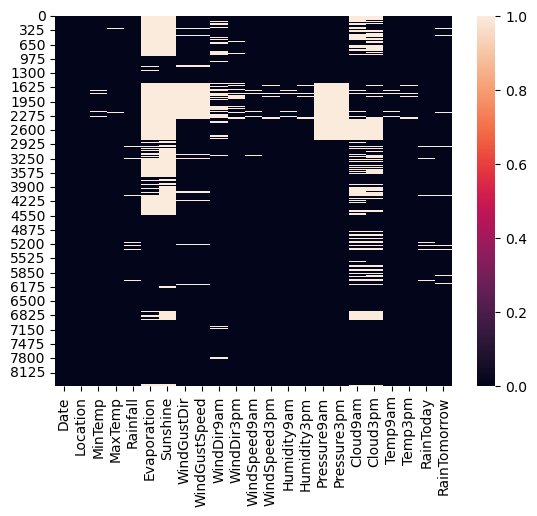

In [10]:
# Let's visualize if there are null values or not using heat map!!
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We can see that Evaporation, Sunshine, Cloud9am Cloud3pm has maximum null values

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


We can see that 'Date' is irrelevant so lets drop that column

In [13]:
df.drop('Date',inplace=True, axis=1)

In [14]:
# Lets check for duplicate values
df.duplicated().sum()

1673

In [15]:
print("Number of duplicate values before =",df.duplicated().sum())

Number of duplicate values before = 1673


In [16]:
#Lets remove duplicate values
df=df[~df.duplicated()]

In [17]:
print("Number of duplicate values after =",df.duplicated().sum())

Number of duplicate values after = 0


In [18]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

## Filling null values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6752 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6752 non-null   object 
 1   MinTemp        6692 non-null   float64
 2   MaxTemp        6705 non-null   float64
 3   Rainfall       6622 non-null   float64
 4   Evaporation    3841 non-null   float64
 5   Sunshine       3526 non-null   float64
 6   WindGustDir    5820 non-null   object 
 7   WindGustSpeed  5820 non-null   float64
 8   WindDir9am     5968 non-null   object 
 9   WindDir3pm     6468 non-null   object 
 10  WindSpeed9am   6699 non-null   float64
 11  WindSpeed3pm   6662 non-null   float64
 12  Humidity9am    6708 non-null   float64
 13  Humidity3pm    6666 non-null   float64
 14  Pressure9am    5454 non-null   float64
 15  Pressure3pm    5451 non-null   float64
 16  Cloud9am       4896 non-null   float64
 17  Cloud3pm       4860 non-null   float64
 18  Temp9am 

We can see that 18 are of numerical types and 4 are of categorical types. So lets fill null numerical values by mean and null categorical values by mode

In [20]:
#Filling null values of numerical datatype
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [21]:
#Filling null values of categorical datatype
df['Location']=df['Location'].fillna(df['Location'].mode())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode())
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode())


In [22]:
# Converting categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['WindGustDir'] = encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = encoder.fit_transform(df['WindDir3pm'])

In [29]:
df = df[np.isfinite(df).all(1)]

# seperating target variable and other variables

In [30]:
X=df.drop(columns =['RainToday',])
Y=df['RainToday']

In [31]:
print(X)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     13.4       0.6     5.302395  7.890896   
1            1      7.4      7.4       0.0     5.302395  7.890896   
2            1     12.9     12.9       0.0     5.302395  7.890896   
3            1      9.2      9.2       0.0     5.302395  7.890896   
4            1     17.5     17.5       1.0     5.302395  7.890896   
...        ...      ...      ...       ...          ...       ...   
8419         9      3.5      3.5       0.0     5.302395  7.890896   
8420         9      2.8      2.8       0.0     5.302395  7.890896   
8421         9      3.6      3.6       0.0     5.302395  7.890896   
8422         9      5.4      5.4       0.0     5.302395  7.890896   
8423         9      7.8      7.8       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
0              13           44.0          13          14  ...          24.0   
1            

In [32]:
print(Y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: RainToday, Length: 6556, dtype: float64


# Machine Learning Algorithm

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4392, 21)
Training target vector size: (4392,)
Test feature matrix size: (2164, 21)
Test target vector size: (2164,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.4192299650442014 on Random_state 48


## Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Algorithm

In [59]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4917, 21)
Training target vector size: (4917,)
Test feature matrix size: (1639, 21)
Test target vector size: (1639,)


#### Finding best Random state

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9822064056939501 on Random_state 215


### **Logistics Regression**

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9713239780353874


Confusion matrix of Logistics Regression : 
 [[1255    0]
 [  47  337]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1255
         1.0       1.00      0.88      0.93       384

    accuracy                           0.97      1639
   macro avg       0.98      0.94      0.96      1639
weighted avg       0.97      0.97      0.97      1639



In [63]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.97332317 0.98245614 0.97330282 0.97787948 0.97254005]
Mean CV Score : 0.9759003320868448
Std deviation : 0.003783543198834383


### **Decision Tree Classifier**

In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 1.0


Confusion matrix of Decision Tree Classifier : 
 [[1255    0]
 [   0  384]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1255
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      1639
   macro avg       1.00      1.00      1.00      1639
weighted avg       1.00      1.00      1.00      1639



In [65]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [1. 1. 1. 1. 1.]
Mean CV Score : 1.0
Std deviation : 0.0


### **Random Forest Classifier**

In [66]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 1.0


Confusion matrix of Random Forest Classifier : 
 [[1255    0]
 [   0  384]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1255
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      1639
   macro avg       1.00      1.00      1.00      1639
weighted avg       1.00      1.00      1.00      1639



In [67]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [1. 1. 1. 1. 1.]
Mean CV Score : 1.0
Std deviation : 0.0


### **AdaBoost Classifier**

In [68]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 1.0


Confusion matrix of AdaBoost Classifier : 
 [[1255    0]
 [   0  384]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1255
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      1639
   macro avg       1.00      1.00      1.00      1639
weighted avg       1.00      1.00      1.00      1639



In [69]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [1. 1. 1. 1. 1.]
Mean CV Score : 1.0
Std deviation : 0.0


### **Gradient Boosting Classifier**

In [70]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 1.0


Confusion matrix of Gradient Boosting Classifier : 
 [[1255    0]
 [   0  384]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1255
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00      1639
   macro avg       1.00      1.00      1.00      1639
weighted avg       1.00      1.00      1.00      1639



In [71]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [1. 1. 1. 1. 1.]
Mean CV Score : 1.0
Std deviation : 0.0


Linear Regression has highest accuracy score

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=32)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred=rfr.predict(X_test)
print('Predicted rain today:\n', y_pred)
print('\n')
print('actual rain today\n',Y_test)

Predicted rain today:
 [1. 0. 0. ... 0. 0. 0.]


actual rain today
 1412    1.0
485     0.0
7340    0.0
411     0.0
8236    0.0
       ... 
8310    0.0
2843    0.0
1013    0.0
1563    0.0
2060    0.0
Name: RainToday, Length: 2557, dtype: float64


# Rain Tomorrow 

# seperating target variable and other variables

In [76]:
X=df.drop(columns =['RainTomorrow',])
Y=df['RainTomorrow']

In [77]:
print(X)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     13.4       0.6     5.302395  7.890896   
1            1      7.4      7.4       0.0     5.302395  7.890896   
2            1     12.9     12.9       0.0     5.302395  7.890896   
3            1      9.2      9.2       0.0     5.302395  7.890896   
4            1     17.5     17.5       1.0     5.302395  7.890896   
...        ...      ...      ...       ...          ...       ...   
8419         9      3.5      3.5       0.0     5.302395  7.890896   
8420         9      2.8      2.8       0.0     5.302395  7.890896   
8421         9      3.6      3.6       0.0     5.302395  7.890896   
8422         9      5.4      5.4       0.0     5.302395  7.890896   
8423         9      7.8      7.8       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
0              13           44.0          13          14  ...          24.0   
1            

In [78]:
print(Y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: RainTomorrow, Length: 6556, dtype: float64


# Machine Learning Algorithm

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4392, 21)
Training target vector size: (4392,)
Test feature matrix size: (2164, 21)
Test target vector size: (2164,)


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.37758890157787295 on Random_state 108


## Standard Scaler

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Algorithm

In [83]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4917, 21)
Training target vector size: (4917,)
Test feature matrix size: (1639, 21)
Test target vector size: (1639,)


#### Finding best Random state

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8601931875953228 on Random_state 256


### **Logistics Regression**

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8370957901159244


Confusion matrix of Logistics Regression : 
 [[1175   61]
 [ 206  197]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1236
         1.0       0.76      0.49      0.60       403

    accuracy                           0.84      1639
   macro avg       0.81      0.72      0.75      1639
weighted avg       0.83      0.84      0.82      1639



In [87]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.86737805 0.7955759  0.7826087  0.86346301 0.85125858]
Mean CV Score : 0.832056845454038
Std deviation : 0.035717279047976384


### **Decision Tree Classifier**

In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7870652837095791


Confusion matrix of Decision Tree Classifier : 
 [[1066  170]
 [ 179  224]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1236
         1.0       0.57      0.56      0.56       403

    accuracy                           0.79      1639
   macro avg       0.71      0.71      0.71      1639
weighted avg       0.79      0.79      0.79      1639



In [89]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.74466463 0.66590389 0.70175439 0.67963387 0.79938978]
Mean CV Score : 0.7182693112686276
Std deviation : 0.04854857554980695


### **Random Forest Classifier**

In [90]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8407565588773642


Confusion matrix of Random Forest Classifier : 
 [[1182   54]
 [ 207  196]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1236
         1.0       0.78      0.49      0.60       403

    accuracy                           0.84      1639
   macro avg       0.82      0.72      0.75      1639
weighted avg       0.83      0.84      0.83      1639



In [91]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.8429878  0.79176201 0.76887872 0.74523265 0.84439359]
Mean CV Score : 0.7986509553310637
Std deviation : 0.03961187797107841


### **AdaBoost Classifier**

In [92]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.8383160463697377


Confusion matrix of AdaBoost Classifier : 
 [[1168   68]
 [ 197  206]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1236
         1.0       0.75      0.51      0.61       403

    accuracy                           0.84      1639
   macro avg       0.80      0.73      0.75      1639
weighted avg       0.83      0.84      0.83      1639



In [93]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.84603659 0.74218154 0.77726926 0.73073989 0.84286804]
Mean CV Score : 0.7878190638313706
Std deviation : 0.04872737041713569


### **Gradient Boosting Classifier**

In [94]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8413666870042709


Confusion matrix of Gradient Boosting Classifier : 
 [[1172   64]
 [ 196  207]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1236
         1.0       0.76      0.51      0.61       403

    accuracy                           0.84      1639
   macro avg       0.81      0.73      0.76      1639
weighted avg       0.83      0.84      0.83      1639



In [95]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.83841463 0.78184592 0.7726926  0.73226545 0.84668192]
Mean CV Score : 0.7943801045561943
Std deviation : 0.04280234646813178


In [ ]:
Random Forest Classifier has highest accuracy score

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=32)
lr=RandomForestClassifier()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred=rfr.predict(X_test)
print('Predicted rain today:\n', y_pred)
print('\n')
print('actual rain today\n',Y_test)

Predicted rain today:
 [1. 0. 0. ... 0. 0. 0.]


actual rain today
 1412    1.0
485     0.0
7340    0.0
411     0.0
8236    0.0
       ... 
8310    0.0
2843    0.0
1013    0.0
1563    0.0
2060    1.0
Name: RainTomorrow, Length: 2557, dtype: float64
